In [1]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

idx = pd.IndexSlice

In [2]:
data_fol = r"..\data_files"

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
from sklearn.cluster import KMeans

In [5]:
df_eng = pd.read_pickle(os.path.join(data_fol, "dataset_no_outliers_engagement.pkl"))
df_bow = pd.read_pickle(os.path.join(data_fol, "tfidf_BoW_180.pkl"))
df_2g = pd.read_pickle(os.path.join(data_fol, 'tfidf_2grams_180.pkl'))
df_23g = pd.read_pickle(os.path.join(data_fol, 'tfidf_23gram_180.pkl'))

132


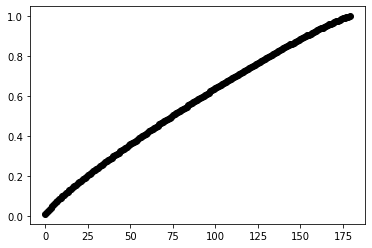

In [53]:
X = StandardScaler().fit_transform(df_bow)
pca = PCA()
pca.fit(X)

fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_),'o-', linewidth=2, color='k', zorder=100)
print(np.where(np.cumsum(pca.explained_variance_ratio_)>=.8)[0][0])
plt.show()

104


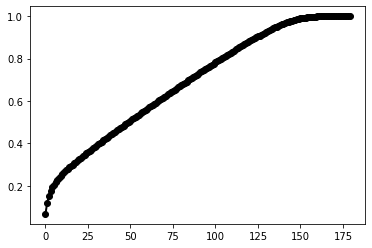

In [54]:
X = StandardScaler().fit_transform(df_2g)
pca = PCA()
pca.fit(X)

fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_),'o-', linewidth=2, color='k', zorder=100)
print(np.where(np.cumsum(pca.explained_variance_ratio_)>=.8)[0][0])
plt.show()

75


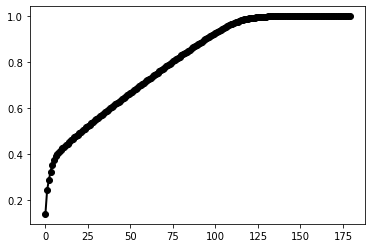

In [6]:
X = StandardScaler().fit_transform(df_23g)
pca = PCA()
pca.fit(X)

fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_),'o-', linewidth=2, color='k', zorder=100)
print(np.where(np.cumsum(pca.explained_variance_ratio_)>=.8)[0][0])
plt.show()

In [7]:
ncomp = 75
pca = PCA(n_components=ncomp)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = range(ncomp))

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(principalDf.values)
    Sum_of_squared_distances.append(km.inertia_)

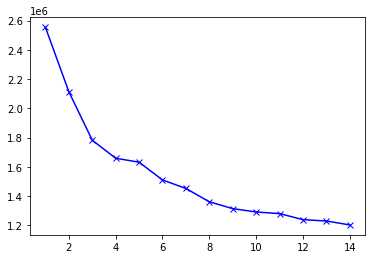

In [9]:
fig, ax = plt.subplots()
ax.plot(K, Sum_of_squared_distances, 'bx-')
plt.show()

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 4 The average silhouette_score is : 0.2851199942749443
For n_clusters = 5 The average silhouette_score is : 0.7566817851871136
For n_clusters = 6 The average silhouette_score is : 0.34132597611552945
For n_clusters = 7 The average silhouette_score is : 0.32508265654718643
For n_clusters = 8 The average silhouette_score is : 0.719806824757803


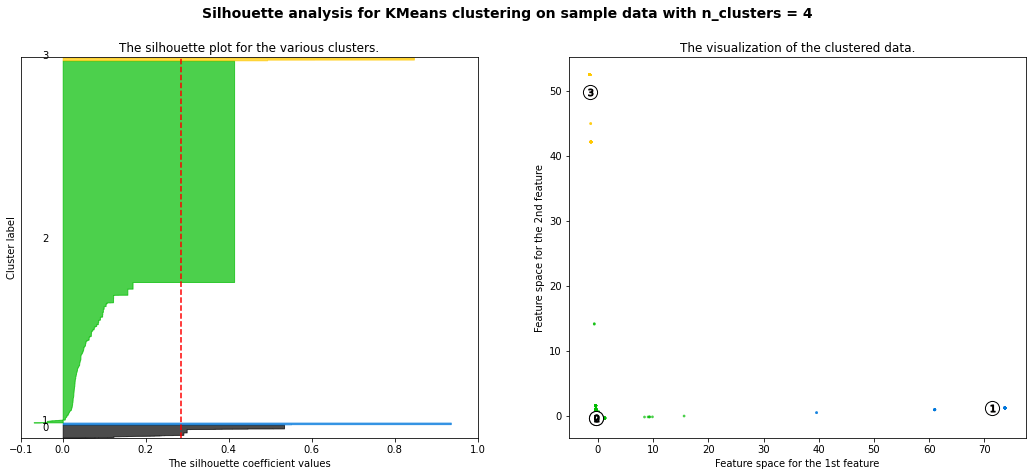

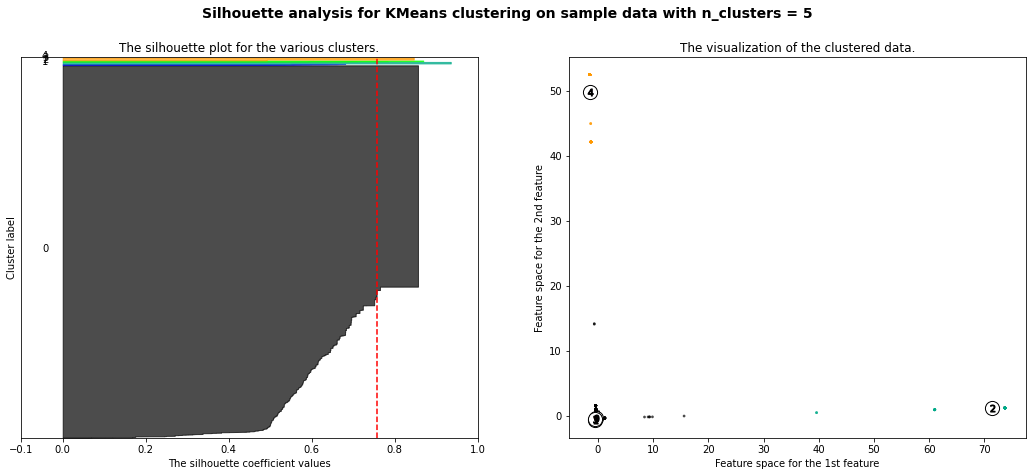

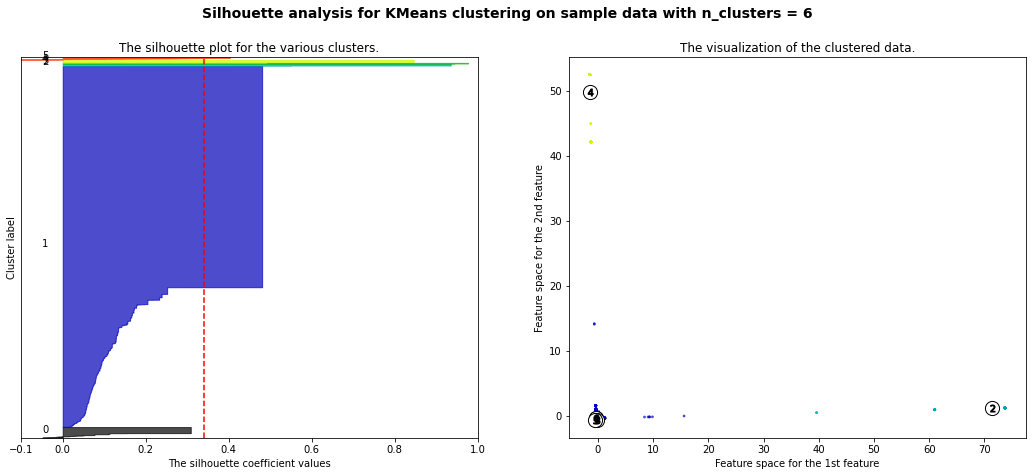

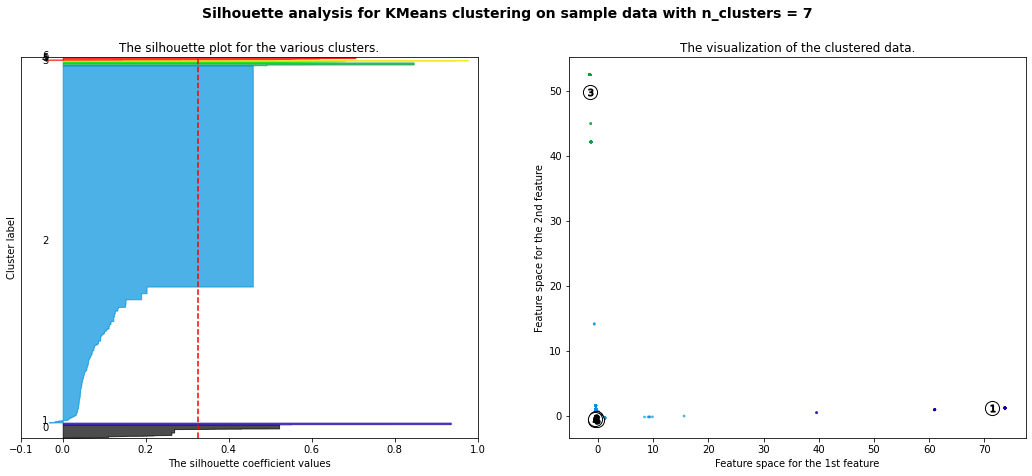

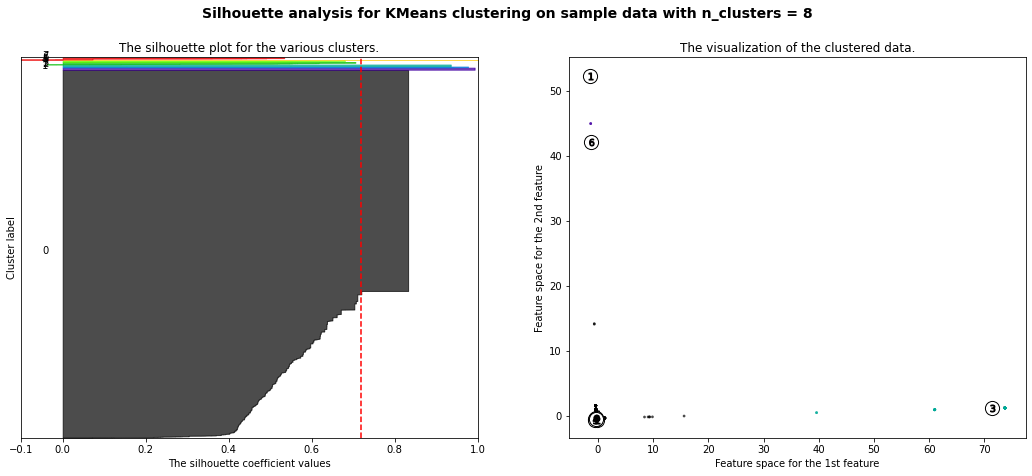

In [60]:
#Code is adapted from the SKlearn page on using silhouette scores to choose your K
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

range_n_clusters = range(4,9)
P = principalDf.values

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(P) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(P)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(P, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(P, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(P[:, 0], P[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

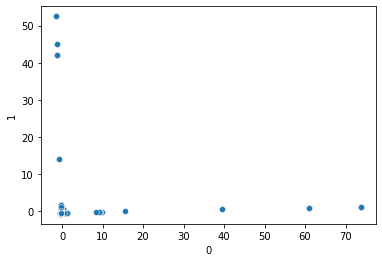

In [61]:
sns.scatterplot(data=principalDf, x=0, y=1,
#            hue = 'clusters',
               legend=False)

plt.show()

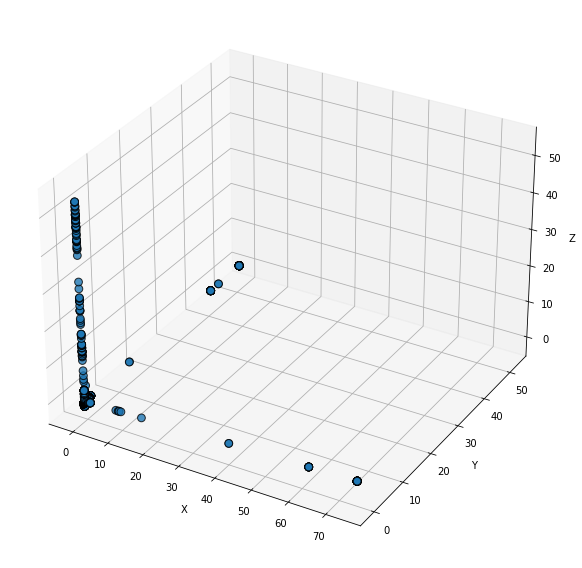

In [62]:
#took this code from case study 15.5 so I can visualize 3 prinicpal components

fig3D = plt.figure(figsize=(10, 8))
ax = fig3D.add_subplot(111, projection='3d')

p = ax.scatter(principalDf[0], principalDf[1], principalDf[2], edgecolors='k', s=60, alpha=.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
                                   
fig3D.tight_layout()

In [11]:
nclus = 5
clusters = KMeans(n_clusters =nclus, random_state=10).fit_predict(principalDf.values)

In [12]:
to_plot_df = principalDf[[0,1,2]]
to_plot_df['clusters'] = clusters
to_plot_df.head()

<ipython-input-12-b4ab9514b0b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot_df['clusters'] = clusters


,0,1,2,clusters
0,-0.351370,-0.400278,-0.217030,0
1,-0.335713,-0.376539,-0.185077,0
2,-0.335713,-0.376539,-0.185077,0
3,-0.335713,-0.376539,-0.185077,0
4,-0.350956,-0.399487,-0.216246,0


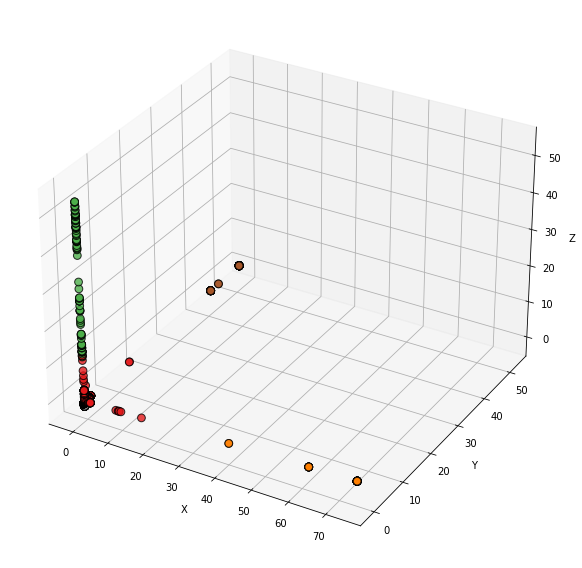

In [13]:
fig3D = plt.figure(figsize=(10, 8))
ax = fig3D.add_subplot(111, projection='3d')

p = ax.scatter(to_plot_df[0], to_plot_df[1], to_plot_df[2], cmap='Set1', c=to_plot_df['clusters'], edgecolors='k', s=60, alpha=.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
                                   
fig3D.tight_layout()

In [14]:
df_eng['clusters'] = clusters

In [15]:
df_eng['clusters'].unique()

array([0, 4, 1, 3, 2])

In [20]:
df_eng.groupby('clusters').count().iloc[:,0]

clusters
0    17563
1      101
2       86
3      132
4       42
Name: quote_count, dtype: int64

In [83]:
df_eng.groupby('clusters').max()

,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,text,media_count,media_types,active_engagement,passive_engagement
clusters,,,,,,,,,,,
0,9,18,115,515,18042456,True,🩸Join us for a discussion with various panelis...,4,video,25,613
1,2,1,13,9,4917,False,Nurse Mulu seen 260 rape victims which reporte...,0,none,2,20
2,0,0,0,1,47,False,YOU ARE THE DISGRACE OF THE COUNTRY REFUSING T...,0,none,0,1
3,2,4,16,24,356558,True,🚨 Upcoming: National Native HIV/AIDS Awareness...,4,photo,4,39
4,0,0,0,0,3,False,"Twitter,facebook,linkedin,flickr,youtube,weibo...",0,none,0,0


In [87]:
df_eng.groupby('clusters').mean()

,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,media_count,active_engagement,passive_engagement
clusters,,,,,,,,,
0,0.191422,0.604016,2.219353,8.704989,17128.909722,0.060641,0.031913,0.795438,10.924342
1,0.046512,0.023256,0.604651,0.348837,566.779070,0.000000,0.000000,0.069767,0.953488
2,0.000000,0.000000,0.000000,0.014085,45.056338,0.000000,0.000000,0.000000,0.014085
3,0.107143,0.232143,1.464286,3.375000,11865.839286,0.125000,0.071429,0.339286,4.839286
4,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
df_23g['clusters'] = clusters

In [22]:
df_23g.groupby('clusters').sum()

,260 rape,260 rape victim,30 year,40 year,accountability justice,acquire disease,acquire disease hiv,aid hiv,awareness day,billion peoplego,...,wife husbandsall usb,woman girl,woman girl hivaids,woman hiv,woman living,work hiv,world test,world test hiv,year ago,young people
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,35.139333,43.903112,0.000000,0.808535,0.000000,80.192326,78.72903,0.000000,...,0.000000,65.709192,30.74451,38.753567,40.460403,38.767718,0.589417,0.589417,111.807137,70.45978
1,0.000000,0.000000,0.000000,0.000000,12.885818,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257055,0.00000
2,15.975341,15.975341,0.000000,0.000000,0.000000,15.945922,15.975341,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,28.637571,...,21.768307,0.000000,0.00000,0.000000,0.000000,0.000000,28.601235,28.601235,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


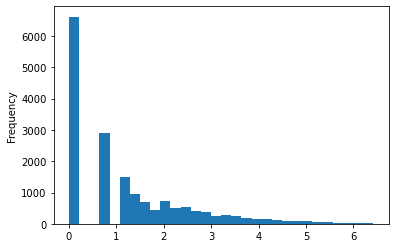

In [23]:
df_eng[df_eng.clusters==0]['passive_engagement'].apply(lambda x: np.log(x+1)).plot(kind='hist', bins=30)
plt.show()

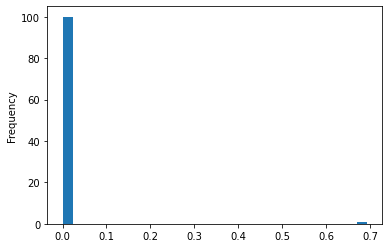

In [24]:
df_eng[df_eng.clusters==1]['passive_engagement'].apply(lambda x: np.log(x+1)).plot(kind='hist', bins=30)
plt.show()

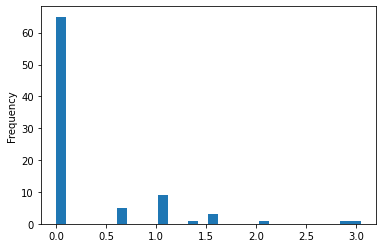

In [25]:
df_eng[df_eng.clusters==2]['passive_engagement'].apply(lambda x: np.log(x+1)).plot(kind='hist', bins=30)
plt.show()

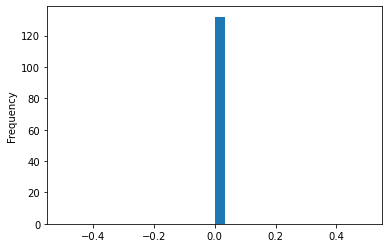

In [26]:
df_eng[df_eng.clusters==3]['passive_engagement'].apply(lambda x: np.log(x+1)).plot(kind='hist', bins=30)
plt.show()

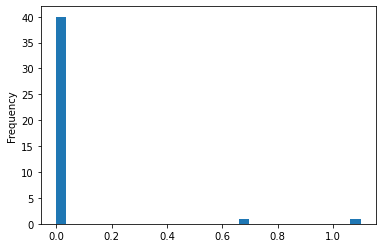

In [27]:
df_eng[df_eng.clusters==4]['passive_engagement'].apply(lambda x: np.log(x+1)).plot(kind='hist', bins=30)
plt.show()

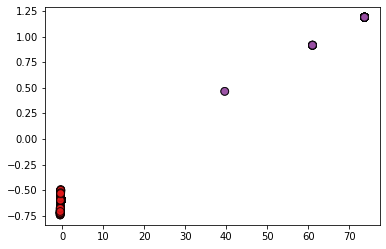

In [31]:
pdf = to_plot_df[to_plot_df.clusters.isin([1,2,4])]

plt.scatter(pdf[0], pdf[1], cmap='Set1', c=pdf['clusters'], edgecolors='k', s=60, alpha=.8)
                                   
plt.show()

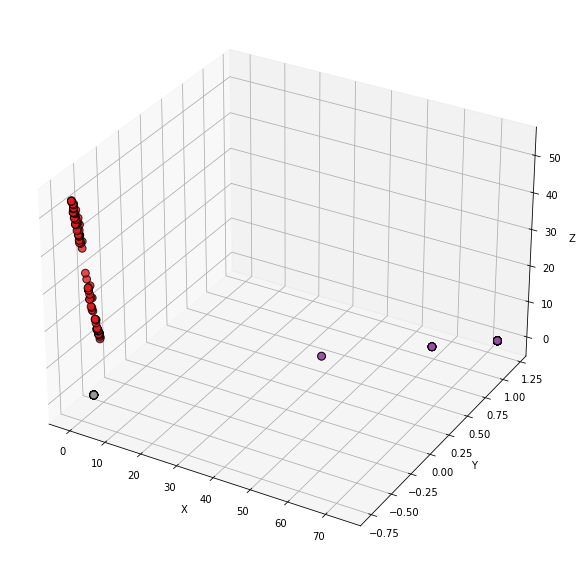

In [28]:
fig3D = plt.figure(figsize=(10, 8))
ax = fig3D.add_subplot(111, projection='3d')

pdf = to_plot_df[to_plot_df.clusters.isin([1,2,4])]

p = ax.scatter(pdf[0], pdf[1], pdf[2], cmap='Set1', c=pdf['clusters'], edgecolors='k', s=60, alpha=.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
                                   
fig3D.tight_layout()

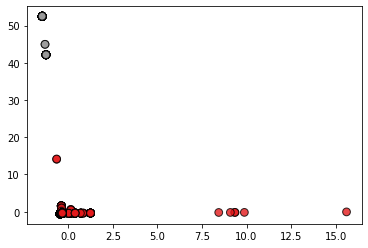

In [32]:
pdf = to_plot_df[to_plot_df.clusters.isin([0,3])]

plt.scatter(pdf[0], pdf[1], cmap='Set1', c=pdf['clusters'], edgecolors='k', s=60, alpha=.8)
                                   
plt.show()

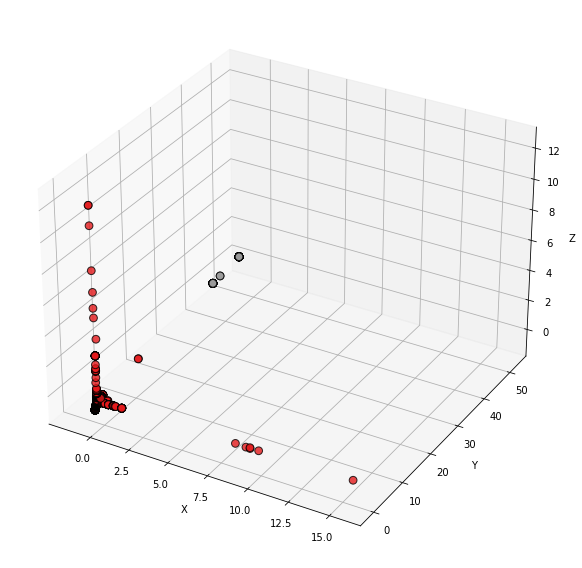

In [29]:
fig3D = plt.figure(figsize=(10, 8))
ax = fig3D.add_subplot(111, projection='3d')

pdf = to_plot_df[to_plot_df.clusters.isin([0,3])]

p = ax.scatter(pdf[0], pdf[1], pdf[2], cmap='Set1', c=pdf['clusters'], edgecolors='k', s=60, alpha=.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
                                   
fig3D.tight_layout()

In [33]:
no_eng = df_eng[df_eng.clusters.isin([2,4])]

In [40]:
no_eng_words = df_23g[df_23g.clusters.isin([2,4])].sum().sort_values(ascending=False)

In [42]:
no_eng_words[no_eng_words > 0]

clusters                    340.000000
hiv hepatitis                25.334016
mulu seen                    16.583033
mulu seen 260                16.583033
nurse mulu                   16.583033
nurse mulu seen              16.583033
seen 260                     16.583033
victim reported              15.975341
260 rape victim              15.975341
acquire disease hiv          15.975341
rape acquire                 15.975341
rape acquire disease         15.975341
rape victim reported         15.975341
reported rape                15.975341
reported rape acquire        15.975341
seen 260 rape                15.975341
260 rape                     15.975341
victim reported rape         15.975341
disease hiv hepatitis        15.945922
acquire disease              15.945922
rape victim                  15.916843
disease hiv                  15.696987
violation taken lightly      14.665047
violation taken              14.665047
taken lightly                14.665047
hepatitis lot            

In [44]:
med_eng_words = df_23g[df_23g.clusters.isin([1])].sum().sort_values(ascending=False)

In [46]:
med_eng_words[med_eng_words > 0]

clusters                                101.000000
hiv med                                  30.149647
refusing hiv                             29.327478
refusing hiv med                         28.217078
held accountable                         27.442302
state nevada                             17.470235
refusing speak                           16.649139
federal investigation                    16.361792
hiv med refusing                         15.952121
med refusing                             15.952121
refusing federal                         15.869465
refusing federal investigation           15.869465
federal investigation accountability     15.050475
investigation accountability             15.050475
accountability justice                   12.885818
health care                               5.895704
mental health                             5.493891
year ago                                  0.257055
dtype: float64

In [47]:
user_ver_words = df_23g[df_23g.clusters.isin([0,3])].sum().sort_values(ascending=False)

In [48]:
user_ver_words[user_ver_words > 0]

clusters                 396.000000
hiv positive             385.980990
hiv aid                  362.959459
living hiv               352.203685
people living            307.975557
                            ...    
refusing hiv med           1.151727
refusing hiv               1.147550
acquire disease            0.808535
disease hiv hepatitis      0.614326
hiv hepatitis stis         0.605862
Length: 144, dtype: float64